In [14]:
%pip install pandas matplotlib

  Using cached matplotlib-3.10.8-cp314-cp314-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-macosx_10_15_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.1.0-cp314-cp314-macosx_11_0_arm64.whl.metadata (8.8 kB)
Using cached matplotlib-3.10.8-cp314-cp314-macosx_11_0_arm64.whl (8.2 MB)
Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-macosx_10_15_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-12.1.0-cp314-cp314-macosx_11_0_arm64.whl (4.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need 

In [2]:
import pandas as pd

In [7]:
bp_missing_df = pd.read_csv("./data-quality-imputation/blood-pressure_missing.csv")
bp_missing_df

,Age,Gender,Cholesterol,SystolicBP,BMI,Smoking,Education
0,67.9,Female,236.4,129.8,26.4,Yes,High
1,54.8,Female,256.3,133.4,28.4,No,Medium
2,68.4,Male,198.7,158.5,24.1,Yes,High
3,67.9,Male,205.0,136.0,19.9,No,Low
4,60.9,Male,207.7,145.4,26.7,No,Medium
...,...,...,...,...,...,...,...
245,48.4,Female,238.2,125.3,31.6,No,Low
246,70.2,Female,225.7,168.1,20.3,Yes,High
247,49.5,Female,NaN,143.3,25.8,No,Low
248,56.7,Male,228.0,130.9,24.0,Yes,High


In [9]:
bp_missing_df.describe()

,Age,Cholesterol,SystolicBP,BMI
count,245.000000,230.000000,250.000000,245.000000
mean,57.630204,224.553478,145.513600,26.740408
std,7.847057,24.334712,10.082832,4.365621
min,33.700000,170.300000,117.500000,13.800000
25%,51.500000,207.900000,138.600000,23.700000
50%,56.900000,222.700000,145.400000,26.600000
75%,63.200000,241.575000,153.200000,29.500000
max,79.300000,303.000000,175.400000,38.700000


Aufgabe 2
b) Dimension Integrity
c) Zunächst kategoriesieren, z.B. alle Werte die ein "ca." davor haben, und in einer neuen Spalte bereinigen. Wichtig: dokumentieren!
d) Dimension Completeness
e) Spezieller Wert wie 999
f) Je nach Analyse muss man entscheiden wie man sie behandelt. Ganze Zeile rauslassen, oder andere Strategie
g) Dimension Consistency
h) RegEx, Datenbank Constraint

In [ ]:
# 3 a)
bp_missing_df.dtypes

Age            float64
Gender             str
Cholesterol    float64
SystolicBP     float64
BMI            float64
Smoking            str
Education          str
dtype: object

Aufgabe 3
b) Fehlertabellen: Automatisch Zeilen in ne Extratabelle verschieben, die Fehler enthalten mit Problembeschreibung


<Axes: >

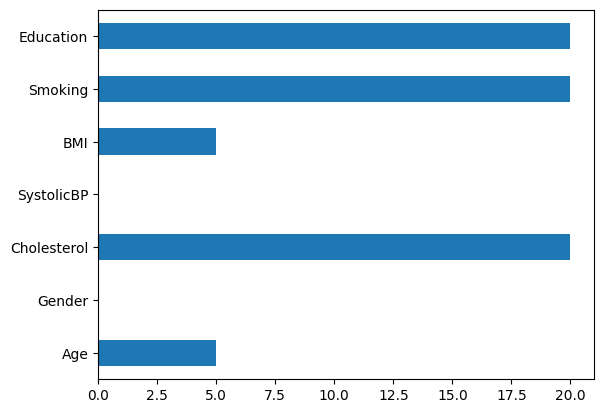

In [17]:
(len(bp_missing_df) - bp_missing_df.count()).plot.barh()

<Axes: ylabel='Education'>

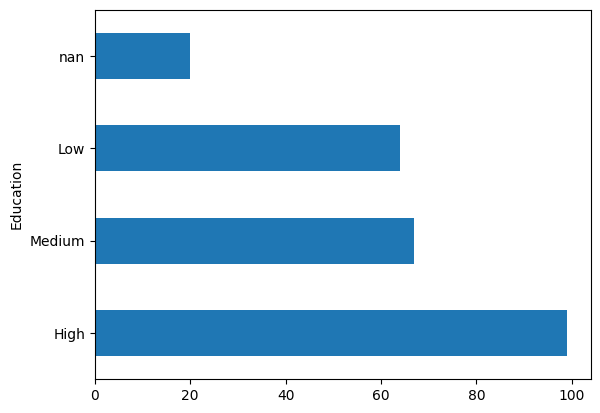

In [41]:
bp_missing_df['Education'].value_counts(dropna=False).plot.barh()

<Axes: ylabel='Smoking'>

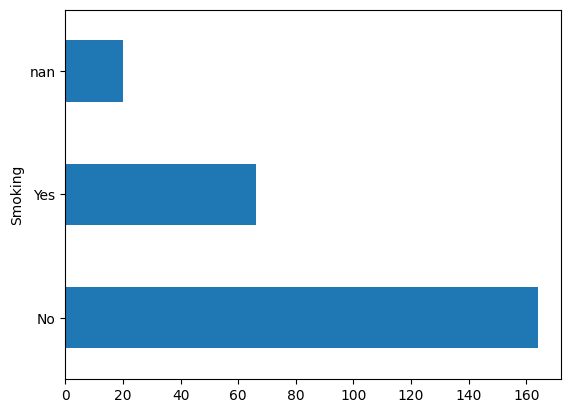

In [39]:
bp_missing_df['Smoking'].value_counts(dropna=False).plot.barh()

<Axes: ylabel='BMI_category'>

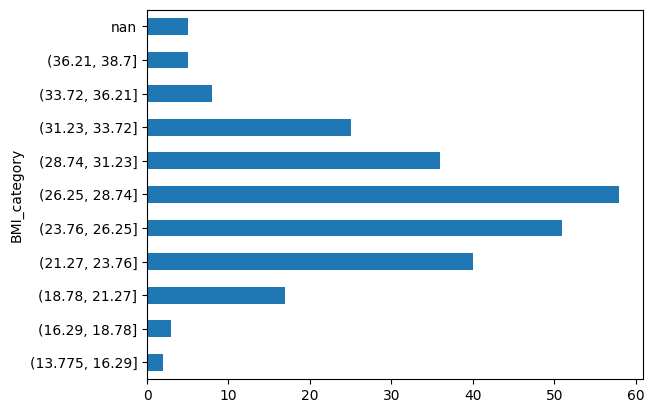

In [40]:
bp_missing_df['BMI_category'] = pd.cut(bp_missing_df['BMI'], bins=10)
bp_missing_df['BMI_category'].value_counts(dropna=False).sort_index().plot.barh()

<Axes: ylabel='SystolicBP_category'>

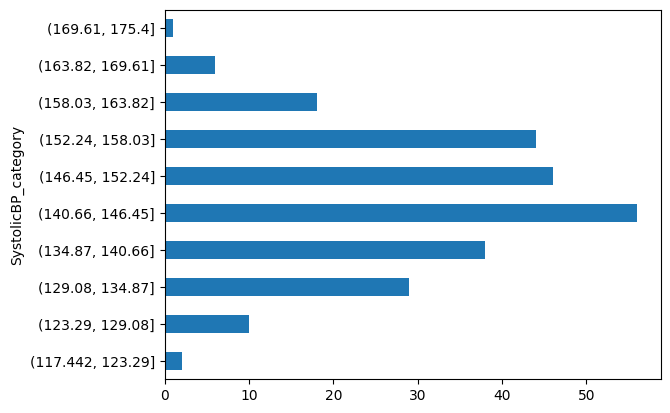

In [42]:
bp_missing_df['SystolicBP_category'] = pd.cut(bp_missing_df['SystolicBP'], bins=10)
bp_missing_df['SystolicBP_category'].value_counts(dropna=False).sort_index().plot.barh()

<Axes: ylabel='Cholesterol_category'>

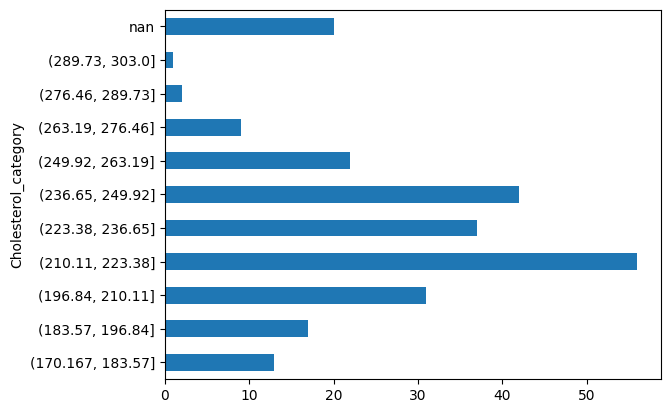

In [43]:
bp_missing_df['Cholesterol_category'] = pd.cut(bp_missing_df['Cholesterol'], bins=10)
bp_missing_df['Cholesterol_category'].value_counts(dropna=False).sort_index().plot.barh()

<Axes: ylabel='Gender'>

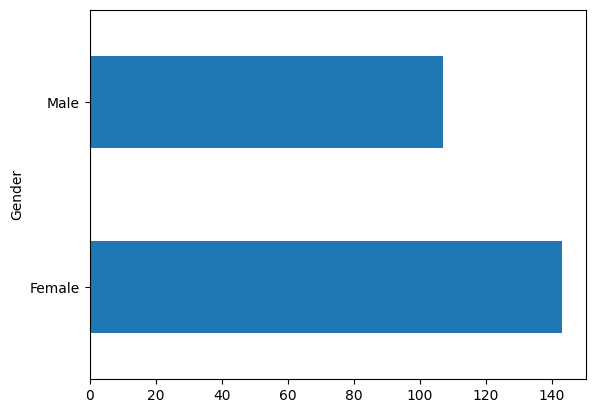

In [44]:
bp_missing_df['Gender'].value_counts(dropna=False).plot.barh()

<Axes: xlabel='Age_category'>

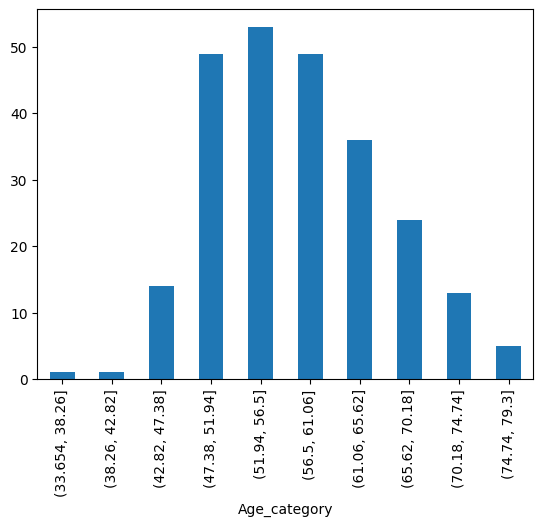

In [46]:
bp_missing_df['Age_category'] = pd.cut(bp_missing_df['Age'], bins=10)
bp_missing_df['Age_category'].value_counts().sort_index().plot.bar()